Emily Wang | GF Baking | MatSci 2016

## Accessing and Plotting the Instron Data Captured
in .csv Format

(See other notebook for the situation with the .csv format)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import numpy as np
import pprint as pp

### XG Bend Tests (Specimen 1, 2, 3)

Data taken on March 24, 2016

In [8]:
# import
bend1 = pd.read_csv('data/XG/XG_Bend_Data/XG_Bend_Specimen_RawData_1.csv', header=[0, 1])
bend2 = pd.read_csv('data/XG/XG_Bend_Data/XG_Bend_Specimen_RawData_2.csv', header=[0, 1])
bend3 = pd.read_csv('data/XG/XG_Bend_Data/XG_Bend_Specimen_RawData_3.csv', header=[0, 1])

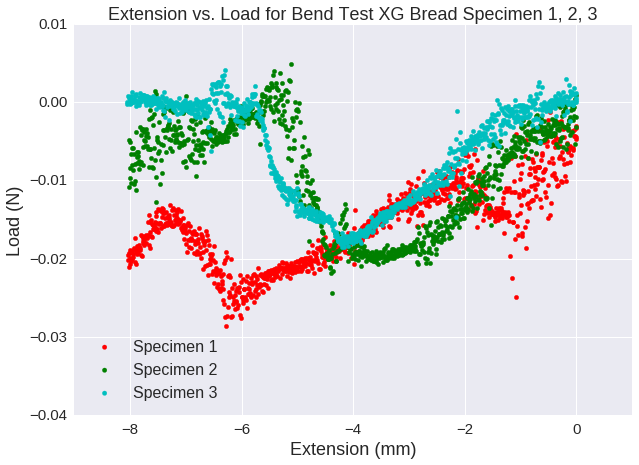

In [7]:
# plotting
pw = plt.figure(figsize=(10,7))
plt.scatter(bend1['Extension'], bend1['Load'], color='r')
plt.scatter(bend2['Extension'], bend2['Load'], color='g')
plt.scatter(bend3['Extension'], bend3['Load'], color='c')

# formatting
plt.title('Extension vs. Load for Bend Test XG Bread Specimen 1, 2, 3', fontsize=18)
plt.xlabel('Extension (mm)', fontsize=18)
plt.ylabel('Load (N)', fontsize=18)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend(['Specimen 1', 'Specimen 2', 'Specimen 3'], loc=3, fontsize=16)
plt.show()

# uncomment if figure saving is desired
# pw.savefig('figures/XG_Bend_Sp123.pdf', format='pdf')
# pw.savefig('figures/XG_Bend_Sp123.png', format='png')

Elizabeth's comment: Specimen 1 didn't break, so that's why its curve is a significantly different shape than Specimen 2 and 3's.

Further cacluations and graphs for the bend tests TBD.